In [4]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [ ]:
# use store models and weight
from keras.models import Sequential
from keras.models import model_from_json

with open('handwriting_model_cnn.json', "r") as text_file:
    json_string = text_file.read()
    model = Sequential()
    model = model_from_json(json_string)
    model.load_weights('handwriting_weights_cnn.h5', by_name=False)

add one channel :  (28, 28, 1)
origion :  1
tranform to 1-hot encoding :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


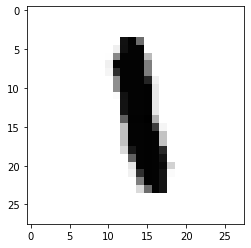

In [16]:
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# expand input to one-channel format 

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print("add one channel : ",x_train[9487].shape)

# extrude matrix only to display image

X = x_train[9487][:,:,0]
plt.imshow(X,cmap='Greys')

# tranform output to 1-hot encoding

print('origion : ',y_train[9487])
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
#print('tranform to 1-hot encoding : ',y_train[9487])

In [23]:
#impelement CNN

from keras.models import Sequential

#Flatten : CNN做完的數個小矩陣, 拉成整個向量在送進Dense層
from keras.layers import Dense, Activation,Flatten

from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Conv32-pooling-Conv64-poolnig-Conv128-pooling-flatten
model = Sequential()

# Conv2D : filter個數,大小(n,n) padding=same 表示輸出大小同輸入
model.add(Conv2D(32,(3,3),padding ='same',input_shape=(28,28,1)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding ='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128,(3,3),padding ='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='mse',optimizer=SGD(lr=0.05),metrics=['accuracy'])

model.summary()

'''
output Param:
(3x3+1)(filter kernal + bias)*32(filter count)
'''

model.fit(x_train, y_train,batch_size=100,epochs=12)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_31 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_32 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 128)        

In [25]:
#show result

score = model.evaluate(x_test,y_test)
print('loss',score[0])
print('acc',score[1])

10000/10000 [==============================] - 2s 233us/step
loss 0.002208280109735586
acc 0.9857000112533569


In [27]:
model_json = model.to_json()
open('handwriting_model_cnn.json','w').write(model_json)
model.save_weights('handwriting_weights_cnn.h5')

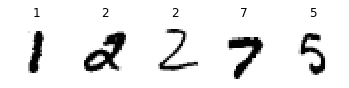

In [30]:
predict = model.predict_classes(x_test)
pick = np.random.randint(1,9999,5)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28),cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")